## EDA

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.shape

(30155, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
df['waterfront'].fillna('NO', inplace=True)
df['view'].fillna('NONE', inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


In [8]:
dfreno = df[df['yr_renovated'] > 0]
dfreno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,1.372000e+03,1.372000e+03,1372.000000,1372.000000,1372.000000,1.372000e+03,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,4.153457e+09,1.455523e+06,3.476676,2.498542,2283.371720,1.951344e+04,1.477405,1852.395773,618.103499,200.853499,280.856414,1939.951166,1998.368805,47.570844,-122.251876
std,2.797812e+09,1.395891e+06,1.141439,1.026099,1033.520817,6.046212e+04,0.509429,837.560013,611.477835,276.502636,279.756397,23.155418,17.928364,0.126233,0.147547
min,1.600034e+07,3.010800e+04,0.000000,0.000000,320.000000,6.930000e+02,1.000000,300.000000,0.000000,0.000000,0.000000,1900.000000,1924.000000,47.175605,-122.525810
25%,1.792950e+09,7.403750e+05,3.000000,2.000000,1550.000000,5.107750e+03,1.000000,1260.000000,0.000000,0.000000,70.000000,1920.000000,1989.000000,47.498913,-122.352345
50%,3.448001e+09,1.100000e+06,3.000000,2.500000,2110.000000,7.961000e+03,1.500000,1690.000000,620.000000,0.000000,210.000000,1942.000000,2002.000000,47.589355,-122.288637
75%,6.610001e+09,1.710875e+06,4.000000,3.000000,2830.000000,1.261275e+04,2.000000,2260.000000,1060.000000,420.000000,410.000000,1958.000000,2013.000000,47.670625,-122.196587
max,9.842300e+09,2.350000e+07,9.000000,9.500000,8882.000000,1.576001e+06,3.000000,8882.000000,3200.000000,1740.000000,2100.000000,2005.000000,2022.000000,47.776925,-121.316360


In [9]:
dfnoreno = df[df['yr_renovated'] == 0]
dfnoreno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.878300e+04,2.878300e+04,28783.00000,28783.000000,28783.000000,2.878300e+04,28783.000000,28783.000000,28783.000000,28783.000000,28783.000000,28783.000000,28783.0,28783.000000,28783.000000
mean,4.556439e+09,1.091996e+06,3.41052,2.326929,2104.276205,1.659061e+04,1.546642,1807.796929,469.267623,336.377237,214.387833,1976.842442,0.0,47.316504,-121.272853
std,2.885333e+09,8.619636e+05,0.97326,0.881781,970.385619,6.037664e+04,0.570163,880.163781,577.208210,284.745817,243.131286,31.462205,0.0,1.466524,5.856539
min,1.000055e+06,2.736000e+04,0.00000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.0,21.274240,-157.791480
25%,2.112701e+09,6.439575e+05,3.00000,2.000000,1410.000000,4.815000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1955.000000,0.0,47.398610,-122.324395
50%,3.876490e+09,8.514500e+05,3.00000,2.500000,1910.000000,7.458000e+03,1.500000,1550.000000,0.000000,400.000000,142.000000,1979.000000,0.0,47.549255,-122.221605
75%,7.299602e+09,1.290000e+06,4.00000,3.000000,2600.000000,1.050000e+04,2.000000,2270.000000,940.000000,510.000000,310.000000,2004.000000,0.0,47.669845,-122.113025
max,9.904000e+09,3.075000e+07,13.00000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,0.0,64.824070,-70.074340


In [10]:
# Create age feature
df['age'] = 2022 - df['yr_built']

# Create is_renovated featire
df['is_renovated'] = df['yr_renovated'] != 0

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age,is_renovated
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,False
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,72,False
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,66,False
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,12,False
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,101,False
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,11,False
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,27,False
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,16,False


In [11]:
formula = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + age"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     3392.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:54:32   Log-Likelihood:            -4.4832e+05
No. Observations:               30155   AIC:                         8.967e+05
Df Residuals:                   30148   BIC:                         8.967e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.615e+05   2.34e+04     -6.900      0.000   -2.07e+05   -1.16e+05
bedrooms    -1.791e+05   5467.549    -32.760      0.000    -1.9e+05   -1.68e+05
bathrooms    1.396e+05   7869.015     17.736      0.000    1.24e+05    1.55e+05
sqft_living   606.3946      7.015     86.448      0.000     592.646     620.143
sqft_lot        0.0586      0.067      0.873      0.382      -0.073       0.190
floors       5.256e+04   8623.834      6.094      0.000    3.57e+04    6.95e+04
age          4111.9220    156.377     26.295      0.000    3805.417    4418.427
==============================================================================
Omnibus:                    43426.804   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48902566.900
Skew:                           8.172   Prob(JB):                         0.00
Kurtosis:                     199.606   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

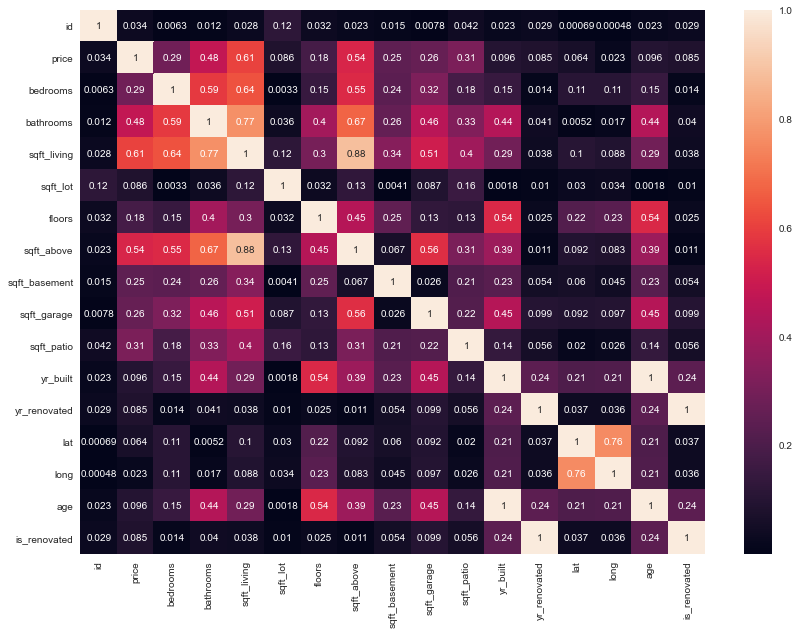

In [12]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr().abs(), annot=True)

In [13]:
historic = df[df['yr_built'] < 1972] 

In [15]:
df.sewer_system.value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [17]:
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'lat',
 'long',
 'age',
 'is_renovated']

In [20]:
df.greenbelt.value_counts()

NO     29382
YES      773
Name: greenbelt, dtype: int64